## Project Description

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

#### Loading the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore,boxcox
from sklearn.preprocessing import LabelEncoder,StandardScaler, PowerTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn import metrics
import pickle

import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',None)

#### Loading the dataset

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Census%20Income/Census%20Income.csv')

Creating a DataFrame

In [3]:
df=pd.DataFrame(data=data)

Checking the DataFrame

In [4]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Checking the head of the column

In [5]:
df.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


Checking the tail of the column

In [6]:
df.tail(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32550,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32551,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32552,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32553,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32554,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


Checking the shape of the dataframe

In [7]:
df.shape

(32560, 15)

Checking the dataframe info

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Checking the datatypes

In [9]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

- The dataset has 32560 rows and 15 columns.
- Both numerical and categorical columns are present in the dataset.
- 2 types of data can be observed in the dataset i.e. Integer and Object.
- No null values are observed in the dataset. Need further analysis.
- We need to predict whether a person makes over $50K a year. Hence, comes under logistic regression. The column Income is our target column. 
- We will build the model using classification.

Checking for null values

In [10]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

- No null values are present in the dataset.

Checking for empty data in the dataset

In [11]:
df[df.values==' '].any()

Age               False
Workclass         False
Fnlwgt            False
Education         False
Education_num     False
Marital_status    False
Occupation        False
Relationship      False
Race              False
Sex               False
Capital_gain      False
Capital_loss      False
Hours_per_week    False
Native_country    False
Income            False
dtype: bool

- No columns with empty data cell is observed.

Separating numerical and categorical columns

In [12]:
num_columns=[column for column in df.columns if df[column].dtypes!='O']
cat_columns=[column for column in df.columns if df[column].dtypes=='O']

Checking the statistical analysis of categorical column

In [13]:
df[cat_columns].describe()

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
count,32560,32560,32560,32560,32560,32560,32560,32560,32560
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27815,21789,29169,24719


- The Workclass column has 9 unique categories. The category Private is the most-frequent with count 22696.
- The Education column has 16 unique categories. The category HS-grad is the most-frequent with count 10501.
- The Marital_status column has 7 unique categories. The category Married-civ-spouse is the most-frequent with count 14976.
- The Occupation column has 15 unique categories. The category Prof-specialty is the most-frequent with count 4140.
- The Relationship column has 6 unique categories. The category Husband is the most-frequent with count 13193.
- The Race column has 5 unique categories. The category White is the most-frequent with count 27815.
- The Sex column has 2 unique categories. The category Male is the most-frequent with count 21789.
- The Native_country column has 42 unique categories. The category United-States is the most-frequent with count 29169.
- The Income column has 2 unique categories. The category <=50K is the most-frequent with count 24719.

Checking the unique values of category columns

Unique values in Workclass

In [14]:
df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

- Each unique value has an empty space at the start. We need to remove the leading spaces from each value.
- We can observe that there is a ? category in the column. This represents missing or unknown values. We can replace ? with Unknown.

Removing leading spaces from each category in column Workclass 

In [15]:
df['Workclass']=df['Workclass'].str.strip()

Replacing category ? with Unknown in Workclass 

In [16]:
df['Workclass']=df['Workclass'].replace('?','Unknown')

Unique values in Education

In [17]:
df['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

- Each unique value has an empty space at the start. We need to remove the leading spaces from each value.

Removing leading spaces from each category in column Education 

In [18]:
df['Education']=df['Education'].str.strip()

Unique values in Marital_status

In [19]:
df['Marital_status'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

- Each unique value has an empty space at the start. We need to remove the leading spaces from each value.

In [20]:
df['Marital_status']=df['Marital_status'].str.strip()

Checking unique values in Occupation

In [21]:
df['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

- Each unique value has an empty space at the start. We need to remove the leading spaces from each value.
- We can observe that there is a ? category in the column. This represents missing or unknown values. We can replace ? with Unknown.

Removing leading spaces from each category in column Occupation

In [22]:
df['Occupation']=df['Occupation'].str.strip()

Replacing ? with Unknown

In [23]:
df['Occupation']=df['Occupation'].replace('?','Unknown')

Checking the unique values of Relationship

In [24]:
df['Relationship'].unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

- Each unique value has an empty space at the start. We need to remove the leading spaces from each value.

Removing leading spaces from each category in column Relationship

In [25]:
df['Relationship']=df['Relationship'].str.strip()

Checking the unique values of Race

In [26]:
df['Race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

- Each unique value has an empty space at the start. We need to remove the leading spaces from each value.

Removing leading spaces from each category in column Relationship

In [27]:
df['Race']=df['Race'].str.strip()

Checking the unique values of Sex column

In [28]:
df['Sex'].unique()

array([' Male', ' Female'], dtype=object)

- Each unique value has an empty space at the start. We need to remove the leading spaces from each value.

Removing leading spaces from each category in column Sex

In [29]:
df['Sex']=df['Sex'].str.strip()

Checking unique values of Native_country column

In [30]:
df['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

- Each unique value has an empty space at the start. We need to remove the leading spaces from each value.
- We can observe that there is a ? category in the column. This represents missing or unknown values. We can replace ? with Unknown.

Removing leading spaces from each category in column Native_country

In [31]:
df['Native_country']=df['Native_country'].str.strip()

Replacing ? with Unknown

In [32]:
df['Native_country']=df['Native_country'].replace('?','Unknown')

Checking unique values of Income column

In [33]:
df['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

- Each unique value has an empty space at the start. We need to remove the leading spaces from each value.

Removing leading spaces from each category in column Income

In [34]:
df['Income']=df['Income'].str.strip()

- All the leading spaces are removed and data cells with value '?' are replaced with 'Unknown'.

The target column has two categories. For category '>50K' we will replace it with 'Greater_than_50k' and for '<=50K' we will replace it with 'Less_tan_50k'.

Replacing '>50K' with 'Greater_than_50k' and '<=50K' with 'Less_tan_50k'

In [35]:
df['Income']=df['Income'].replace({'<=50K':'Less_than_50k','>50K':'Greater_than_50k'})

Checking the value count of Income column

In [36]:
df['Income'].value_counts(normalize=True)

Income
Less_than_50k       0.759183
Greater_than_50k    0.240817
Name: proportion, dtype: float64

- We can observe that almost 76 percent of the dataset is of population with less than or equal to 50k income.
- Hence, the dataset is biased.

Statistical analysis of numerical columns

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital_loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


- In column Age, mean is slightly greater than median. Hence the column is right skewed.
- In column Fnlwgt, mean is greater than mdeian. Hence the column is right skewed.
- In column Education_num, the mean and median is same. Hence no skewness is observed.
- In column Capital_gain, we observe that the mean is very much greater than median. Hence, the column is highly right skewed. Also, we observe outliers present in the column.
- In column Capital_loss, the mean is greater than median. Hence, the column is right skewed.
- In column Hours_per_week, mean and median is equal. Hence, no skewness is observed.

Checking the unique values of Education_num column

In [38]:
df['Education_num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

Checking the total unique counts

In [39]:
df['Education_num'].nunique()

16

- We can observe that Education_num column in the dataset represents a numerical encoding of column Education. This column provides a more straightforward, quantifiable measure of education level compared to the categorical column Education.
- Hence we can drop the Education column.

### Data Visualisation

Univariate analysis

Visualize categorical columns using count plot

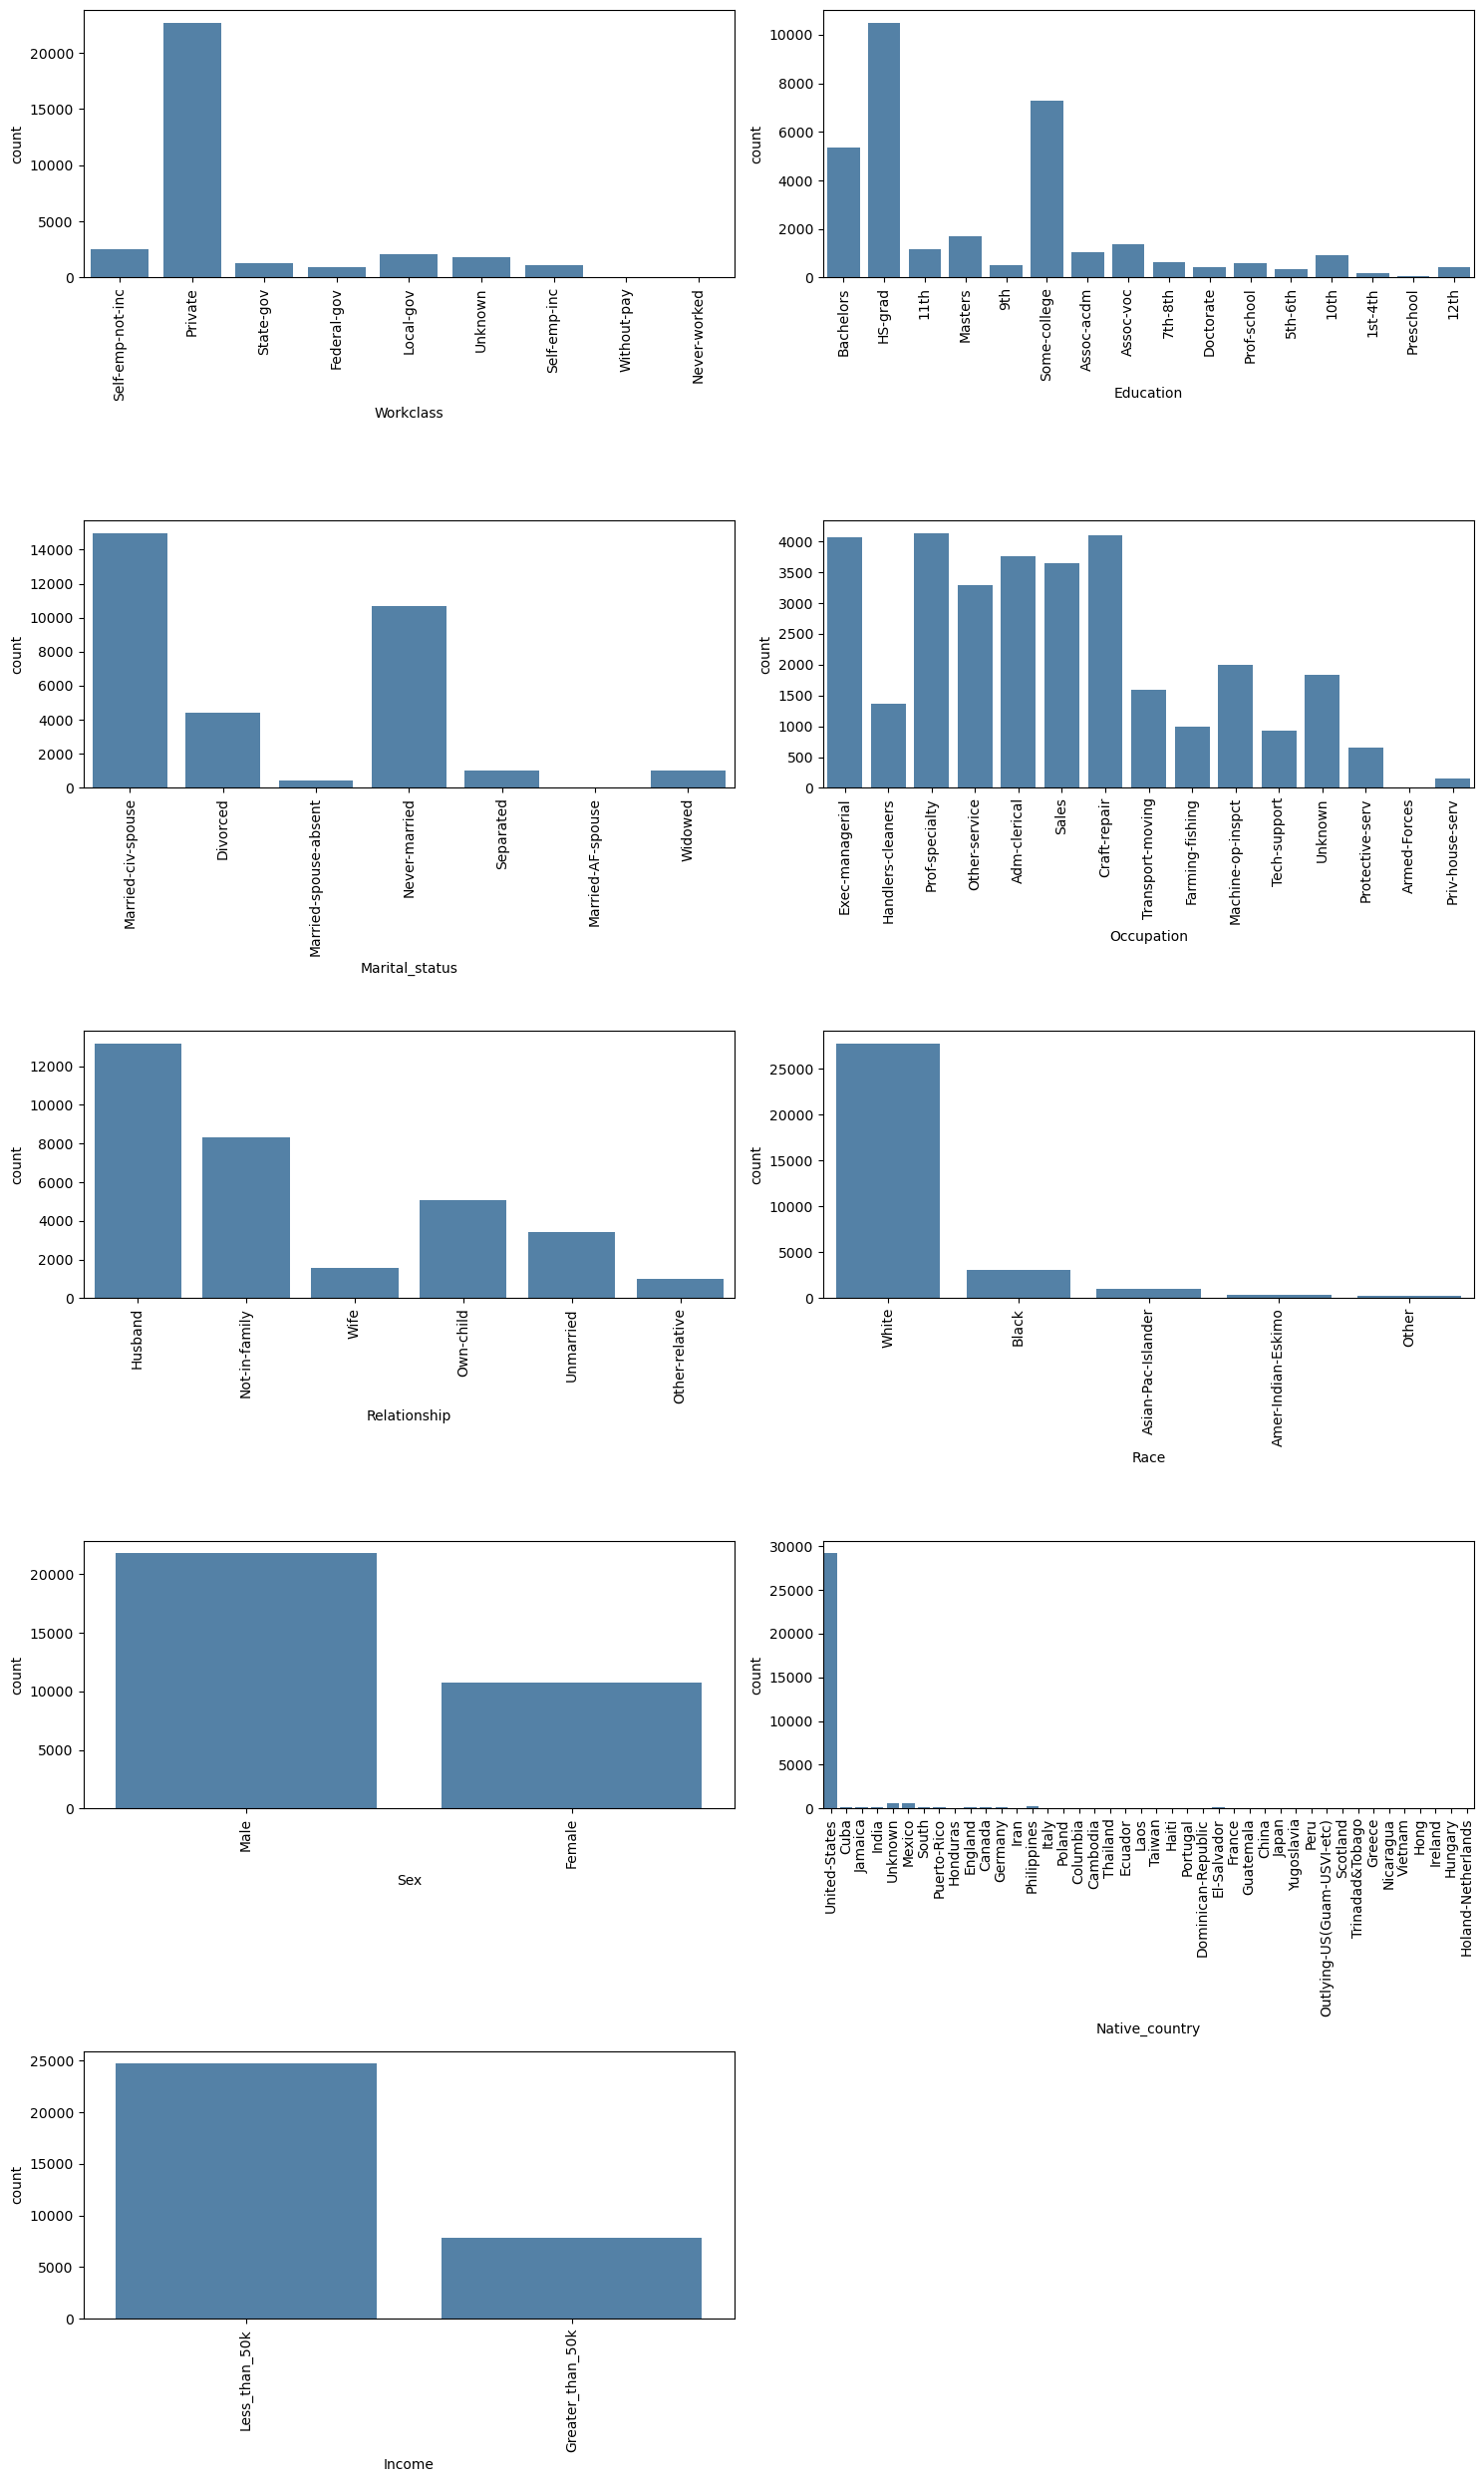

In [40]:
plt.figure(figsize=(15,25))
for index,column in enumerate(cat_columns):
    if index<=len(cat_columns):
        plt.subplot((len(cat_columns)+1)//2,2,index+1)
        sns.countplot(x=column,data=df,color='Steelblue',linewidth=.1)
        plt.xlabel(column)
        plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

- Most of the indivisuals work at private sector. A small number of population works at self-emp-not-inc, state-gov, Federal-gov, Local-gov,self-emp-inc. Also, a small number of population's work is unknown. A very small number population never worked and without pay.
- In Education, count of HS-grad is highest. There is a sizable number of individuals with some-college and Bachelors degree. Individuals with other levels of education also present in small number such Masters, 11th, assoc-voc, doctorate etc. The count of preschool and 1st-4th is lowest.
- The count of married-civ-spouse is highest. High numbers of unmarried individuals are also present in the dataset. There is a sizable number of divorced indiduals are present. A small numbers of persons with never-married, separated and widowed are also present.
- Occupation such as exec-managerial, Prof-specialty, other-service, adm-clerical, sales, craft-repair are in high numbers in the dataset. Occupation such as handlers-cleaners, transport-moving, Farming-fishing, machine-op-inspct are in small numbers. There is a sizable number of individual's occupation is unknown.
- In Relationship column, highest number of counts is of husbands. Moderate number of individuals are not in family. There are other categories in the dataset which are low numbers i.e. wife, own-child, unmarried.
- In this dataset, most of the individuals are of white race. There are other races in the dataset which are in small numbers i.e. black, asian-pac-islander, amer-indian-eskima. The column is highly biased.
- In Sex column, ratio of male is much higher than female.
- Most of the individuals in native country column is from United States. There are individuals from other country which are in very small numbers.
- In the Income column which is our target, individuals income less than 50K is very high compared to individuals income greater than 50K. Hence the column is very biased. 

Visualising numerical columns using histplot

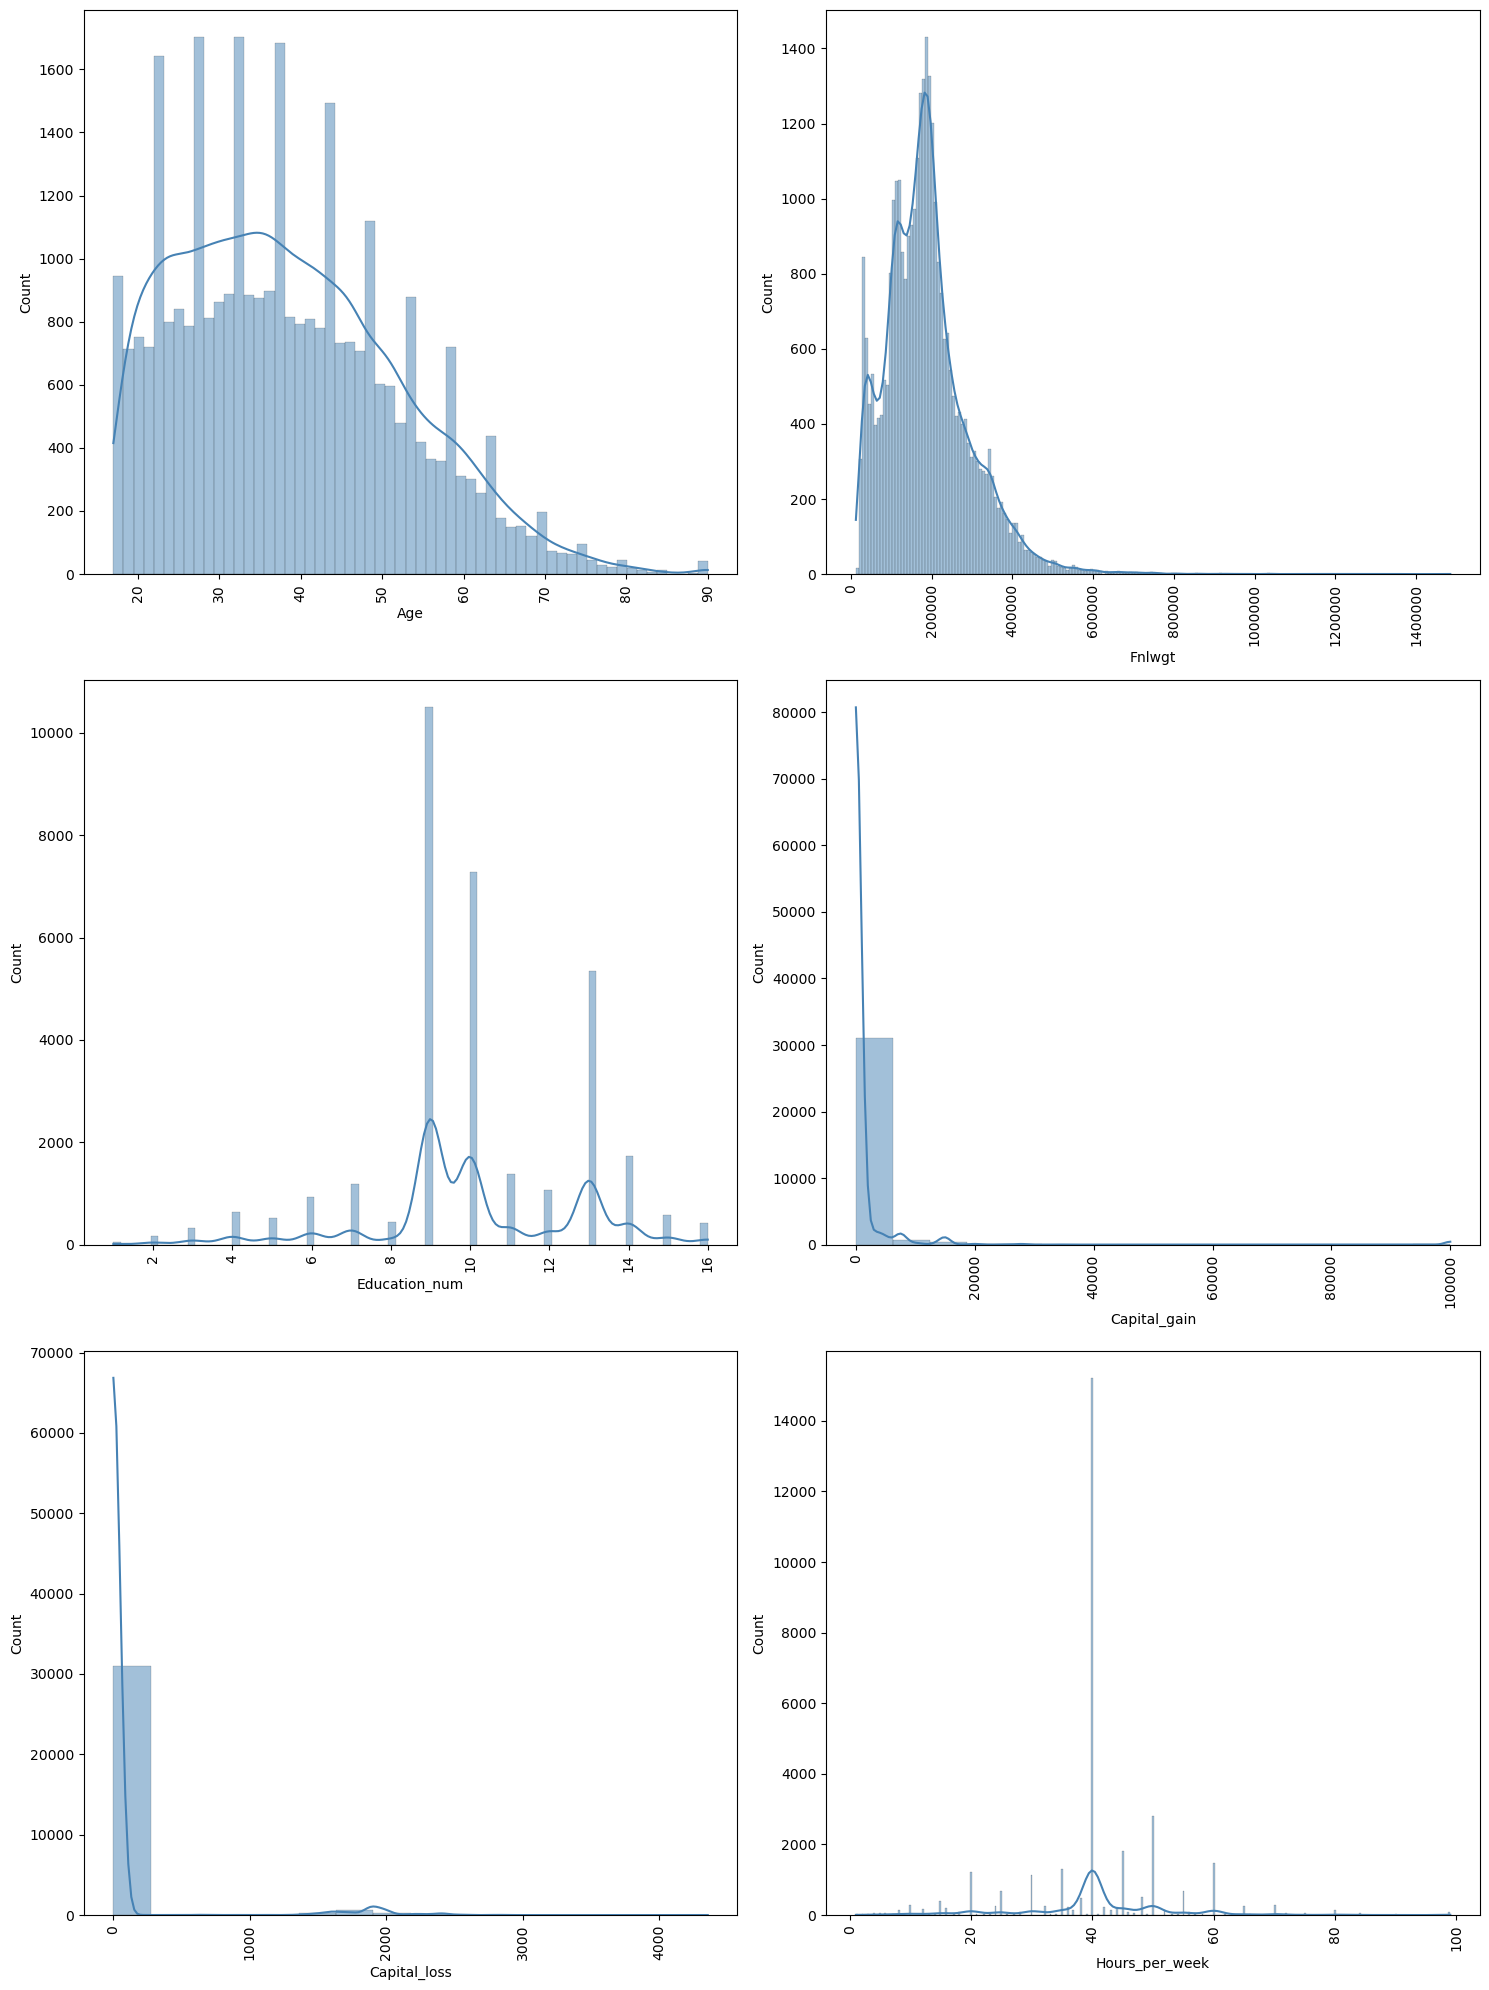

In [41]:
plt.figure(figsize=(15,20))
for index,column in enumerate(num_columns):
    if index<=len(num_columns):
        plt.subplot((len(num_columns)+1)//2,2,index+1)
        sns.histplot(x=column,linewidth=.1,color='Steelblue',kde=True,data=df)
        plt.xlabel(column)
        plt.ticklabel_format(style='plain',axis='x')
        plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

- We can observe that the column Age has right skewness. 
- In column Fnlwgt, low right skewness can be observed.
- The column Capital_gain and Capital_loss is right skewness.
- In column Hours_per_week has no skewness observed.
- We need to perform further analysis to check skewness.

Bivariate analysis

Visualising categorical columns with Income using count plot

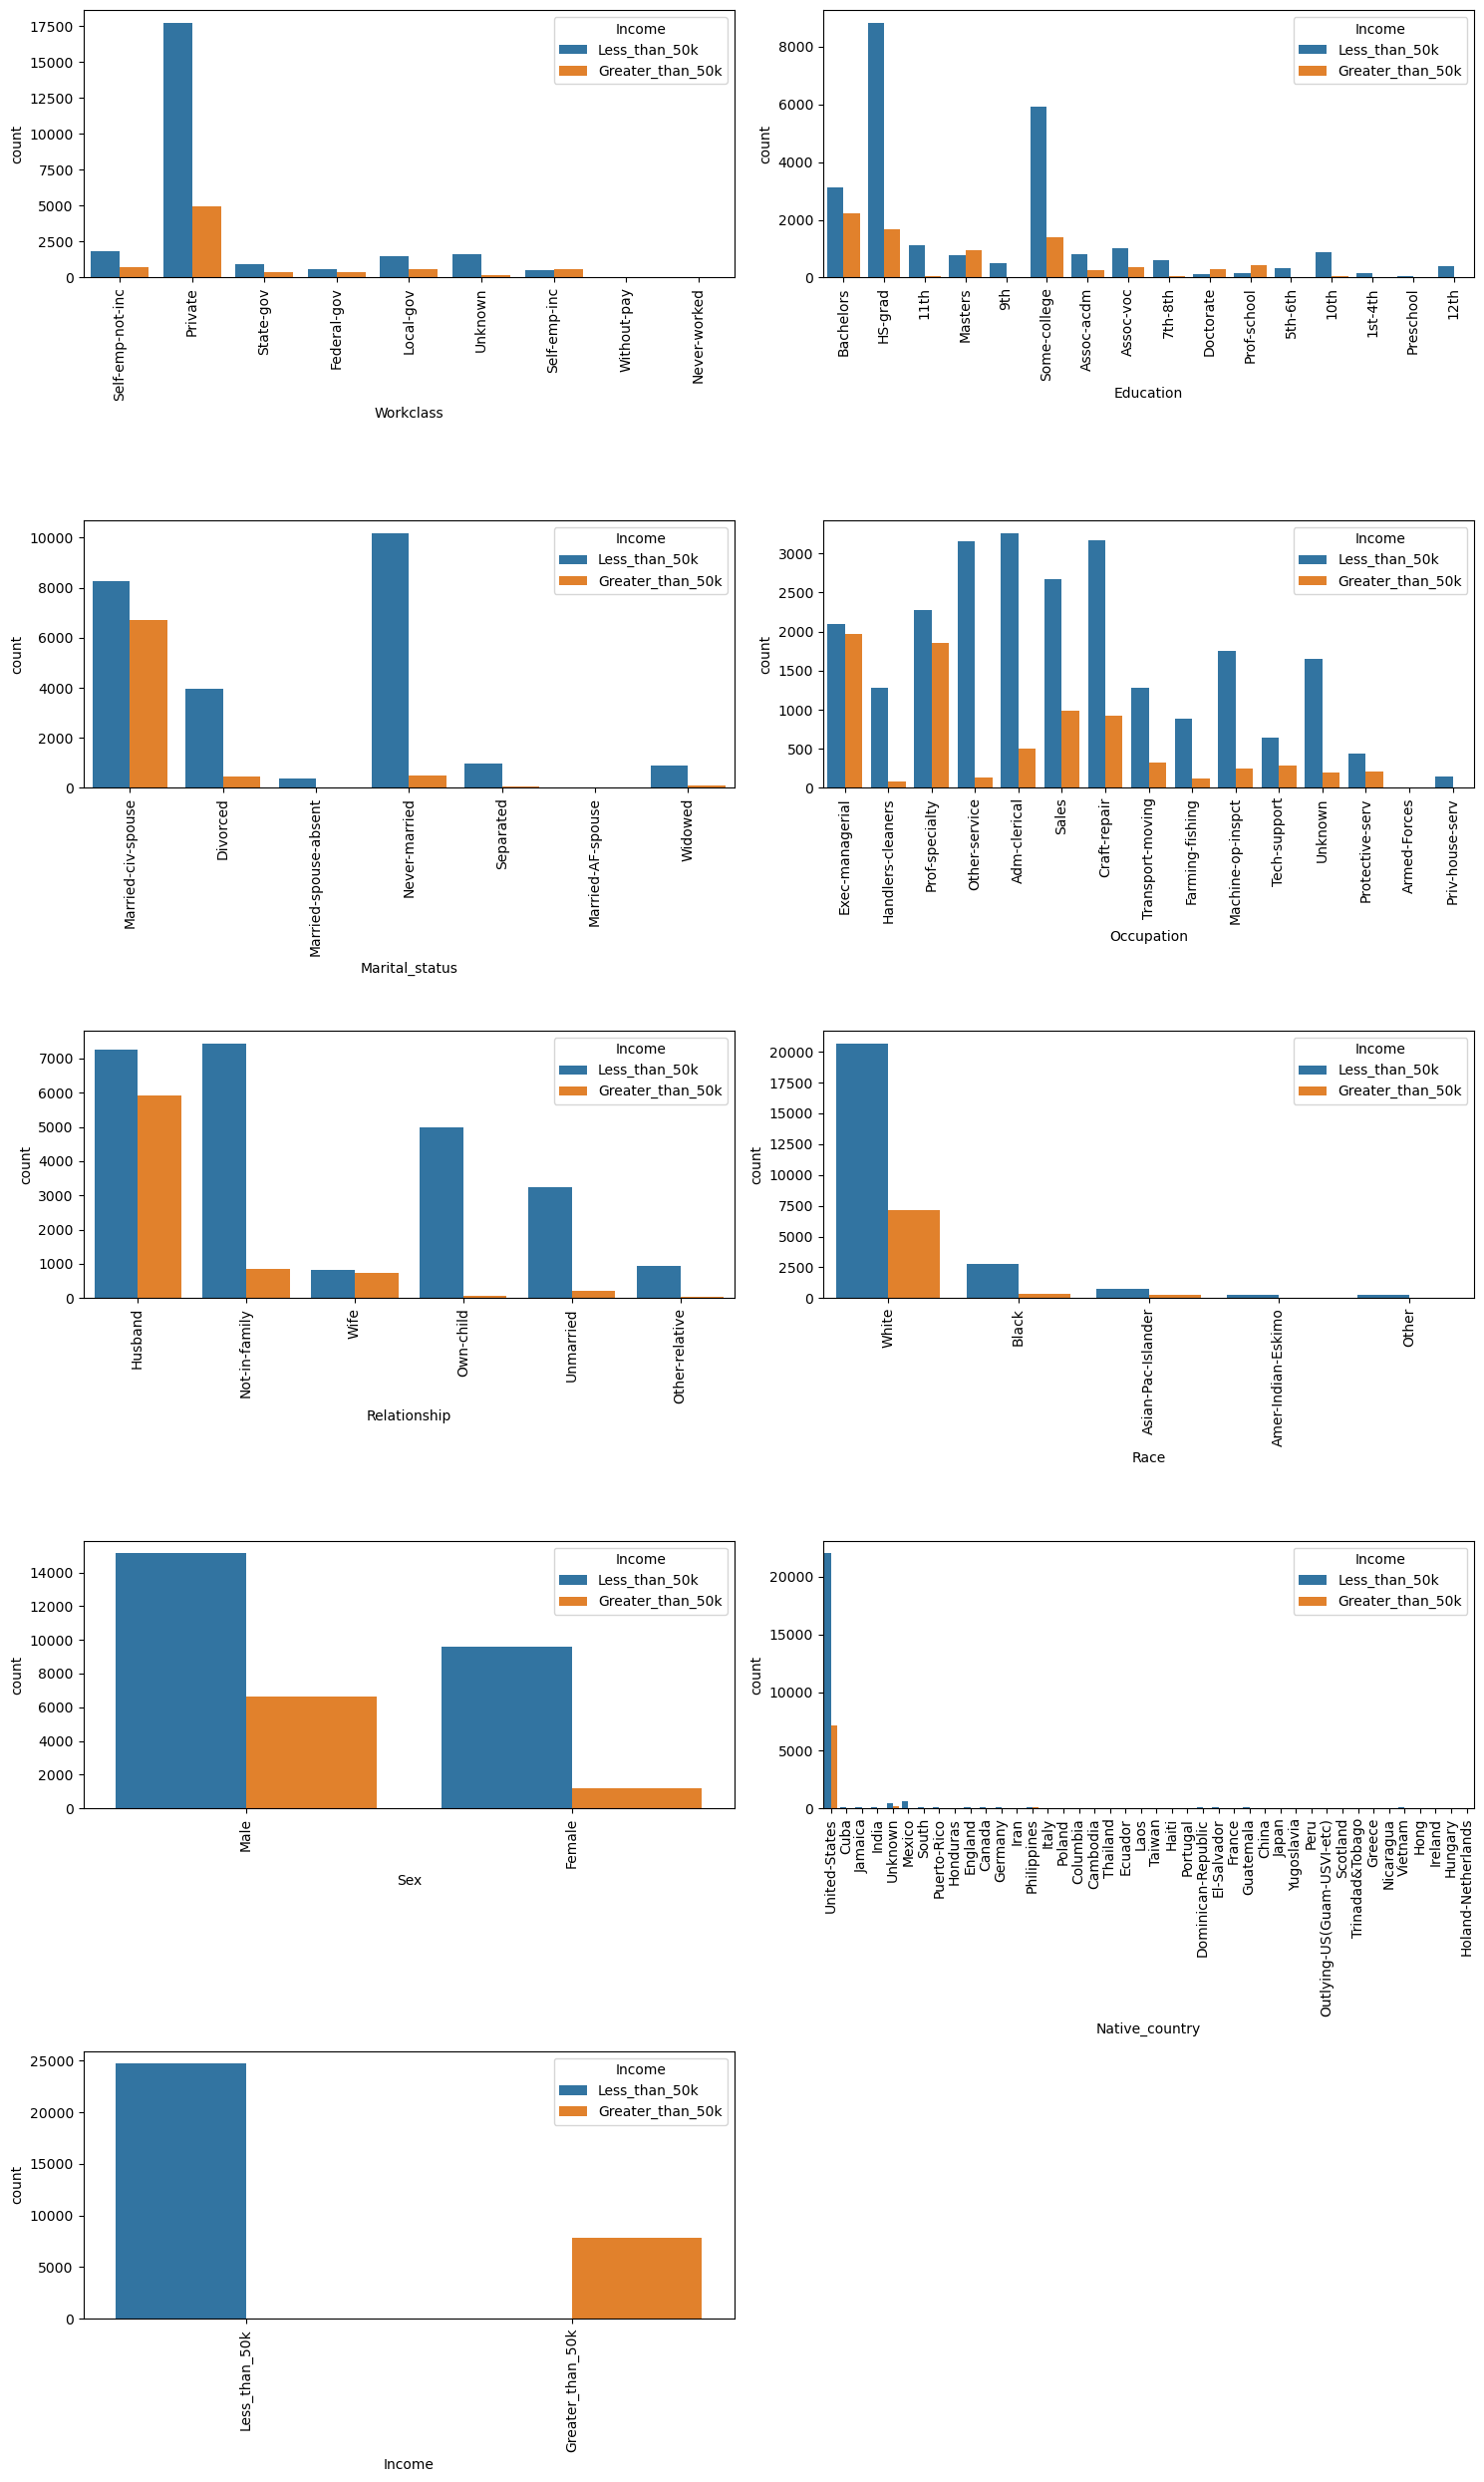

In [43]:
plt.figure(figsize=(15,25))
for index,column in enumerate(cat_columns):
    if index<=len(cat_columns):
        plt.subplot((len(cat_columns)+1)//2,2,index+1)
        sns.countplot(x=column,hue='Income',data=df,linewidth=.1)
        plt.xlabel(column)
        plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

- In Workclass, Private employess has the highest count of income which is greater than 50K. However, ratio wise, in category self-emp-inc the count of indivisual earns greater than 50K is more than individuals earn less than 50K.
- Individuals with bachelors degree has the highest count of income with more than 50K. The ratio of individuals with masters and doctorate degree earns greater than 50K is more than individuals earn less than 50K.
- Marries-civ-spouse in Marital_status has the highest count of income which is greater than 50K. 
- In occupation column, Exec-managerial and Prof-specialty has high count of income which is greater than 50K. Category Sales and Craft-repair has moderate count of income which is greater than 50K. The ratio of income greater than 50K is less compared to income less than 50K.
- Husband has the highest count of income gerater than 50K. The ratio of income greater than 50K is less compared to income less than 50K throughout each category in Relationship.
-  White race has the highest count of income gerater than 50K. The count of other races for income greater than 50K is very less.
- Count of income gerater than 50K is much higher than female. However, both male and female, the ratio of income less than 50K is higher.

Visualising numerical column with Income using Histplot

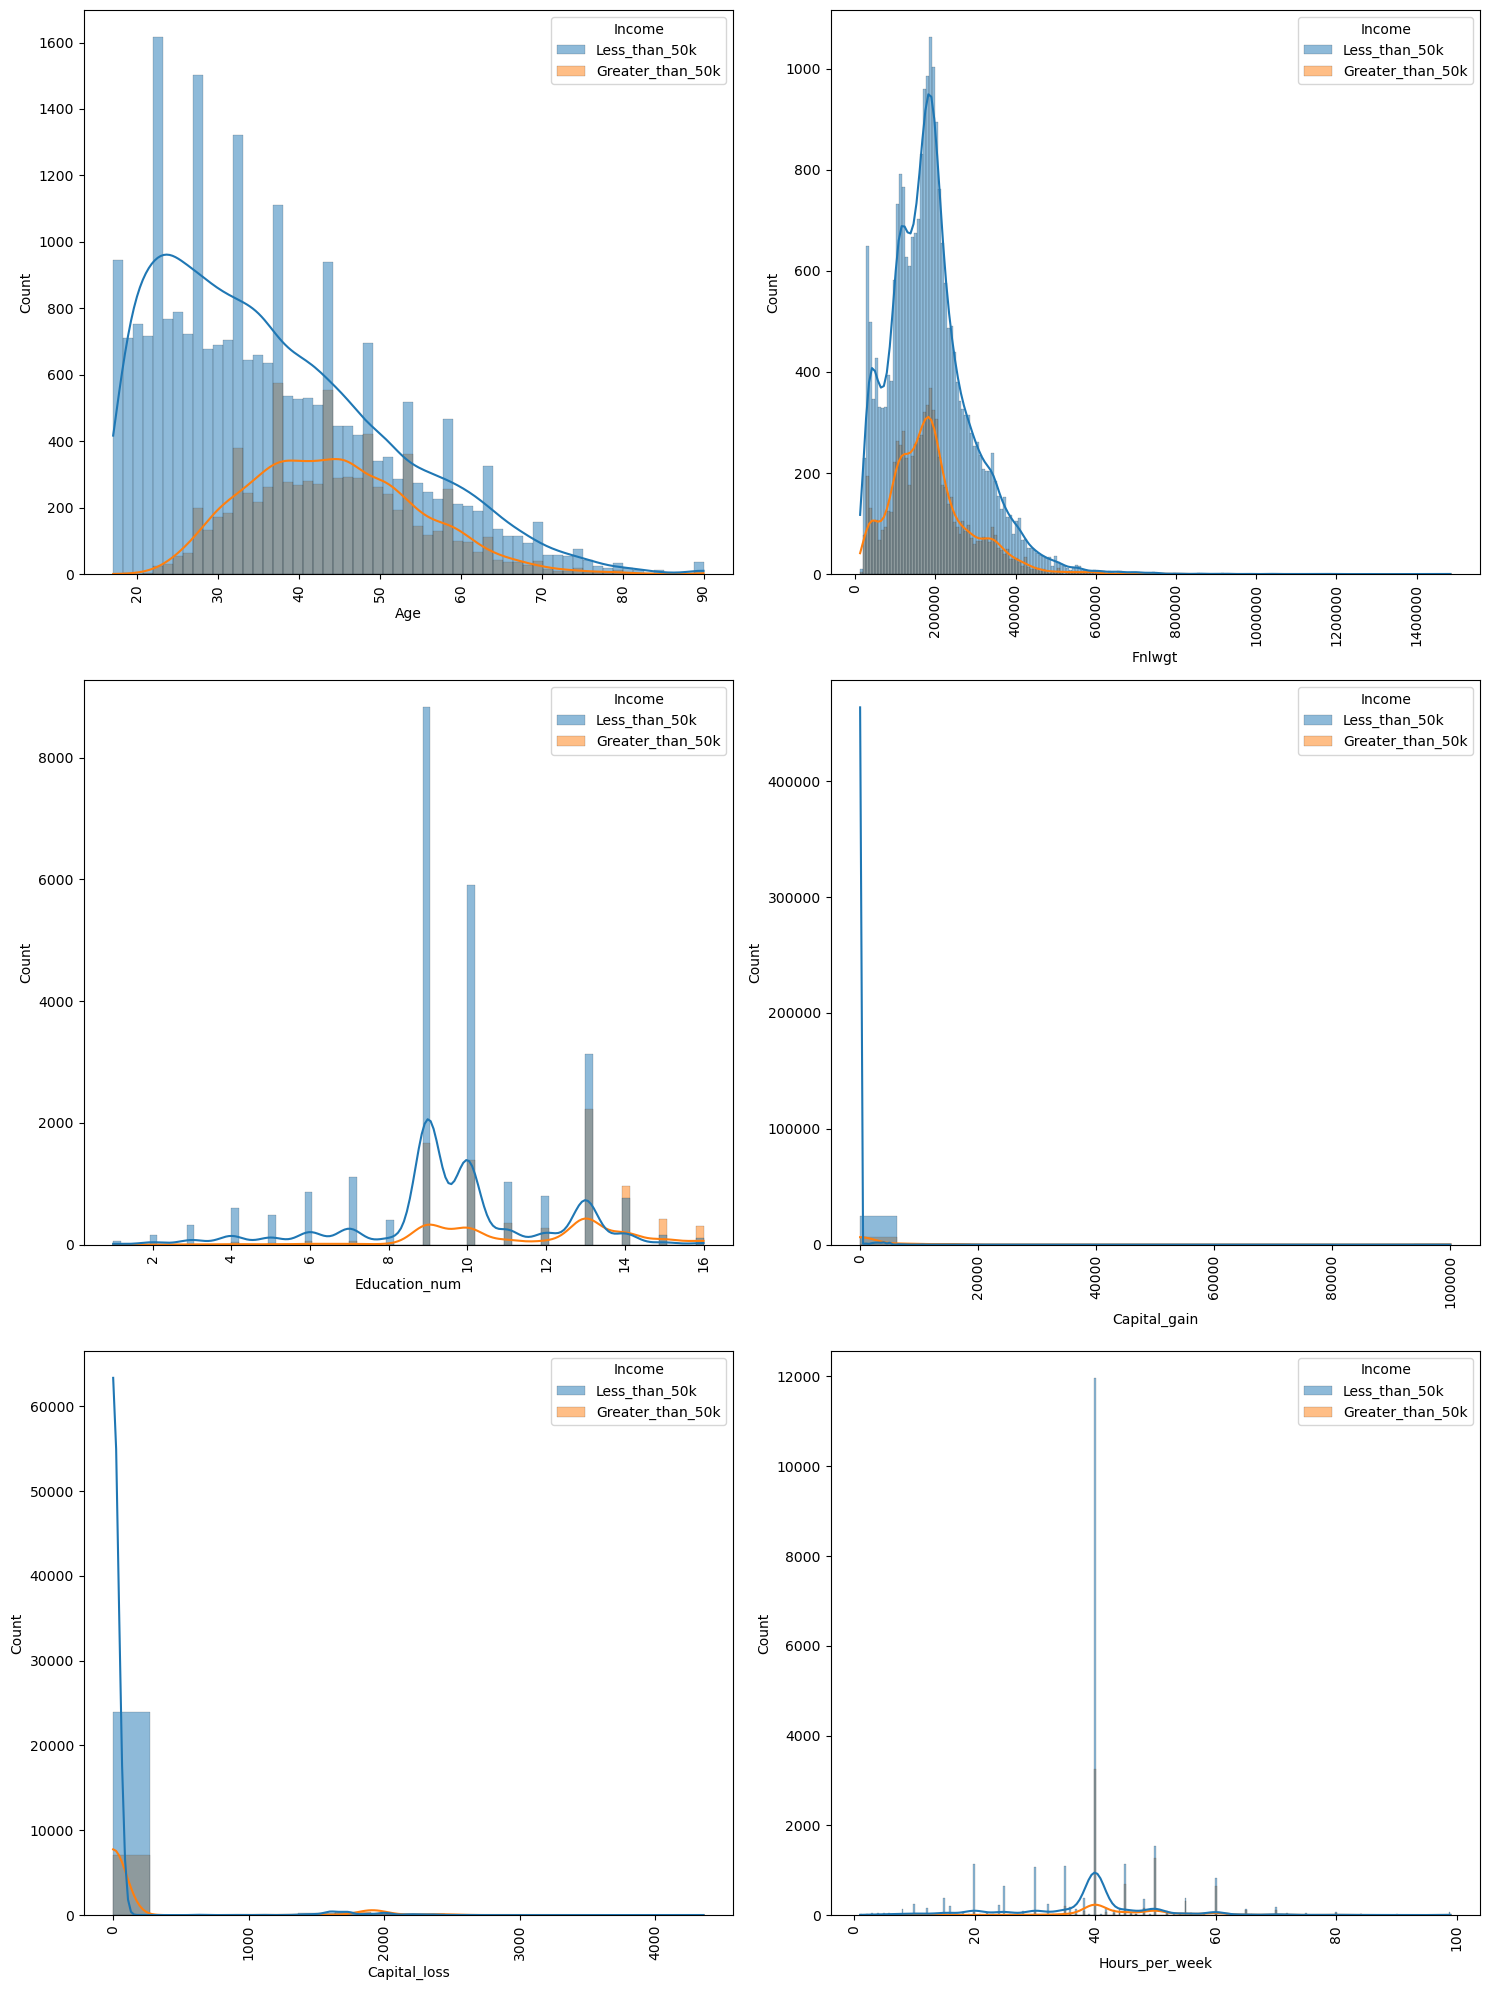

In [44]:
plt.figure(figsize=(15,20))
for index,column in enumerate(num_columns):
    if index<=len(num_columns):
        plt.subplot((len(num_columns)+1)//2,2,index+1)
        sns.histplot(x=column,hue='Income',color='Steelblue',linewidth=.1,kde=True,data=df)
        plt.xlabel(column)
        plt.ticklabel_format(style='plain',axis='x')
        plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

- We can observe that in all the columns individual's income is greater than 50K is less than individual's income is less than 50K.

Checking for individuals who has capital gains

<Axes: xlabel='Income', ylabel='count'>

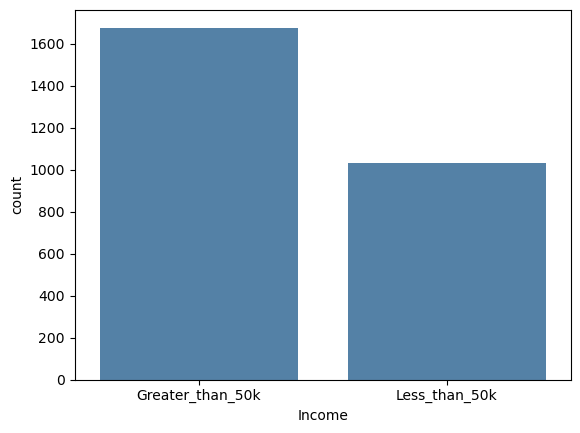

In [45]:
capital_gain_not_0=df[df['Capital_gain']!=0]
sns.countplot(x='Income',color='Steelblue',data=capital_gain_not_0)

- We can observe that individuals who has capital gains, the count of income greater than 50K is more than income less than 50K. 

Checking for individuals who has capital loss

<Axes: xlabel='Income', ylabel='count'>

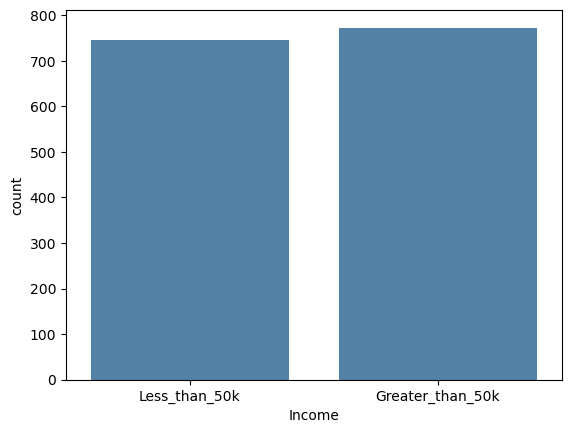

In [46]:
capital_loss_not_0=df[df['Capital_loss']!=0]
sns.countplot(x='Income',color='Steelblue',data=capital_loss_not_0)

- We can observe that income ratio is almost same amoung individuals earing less than 50K and greater than 50.

Mulitivariate analysis

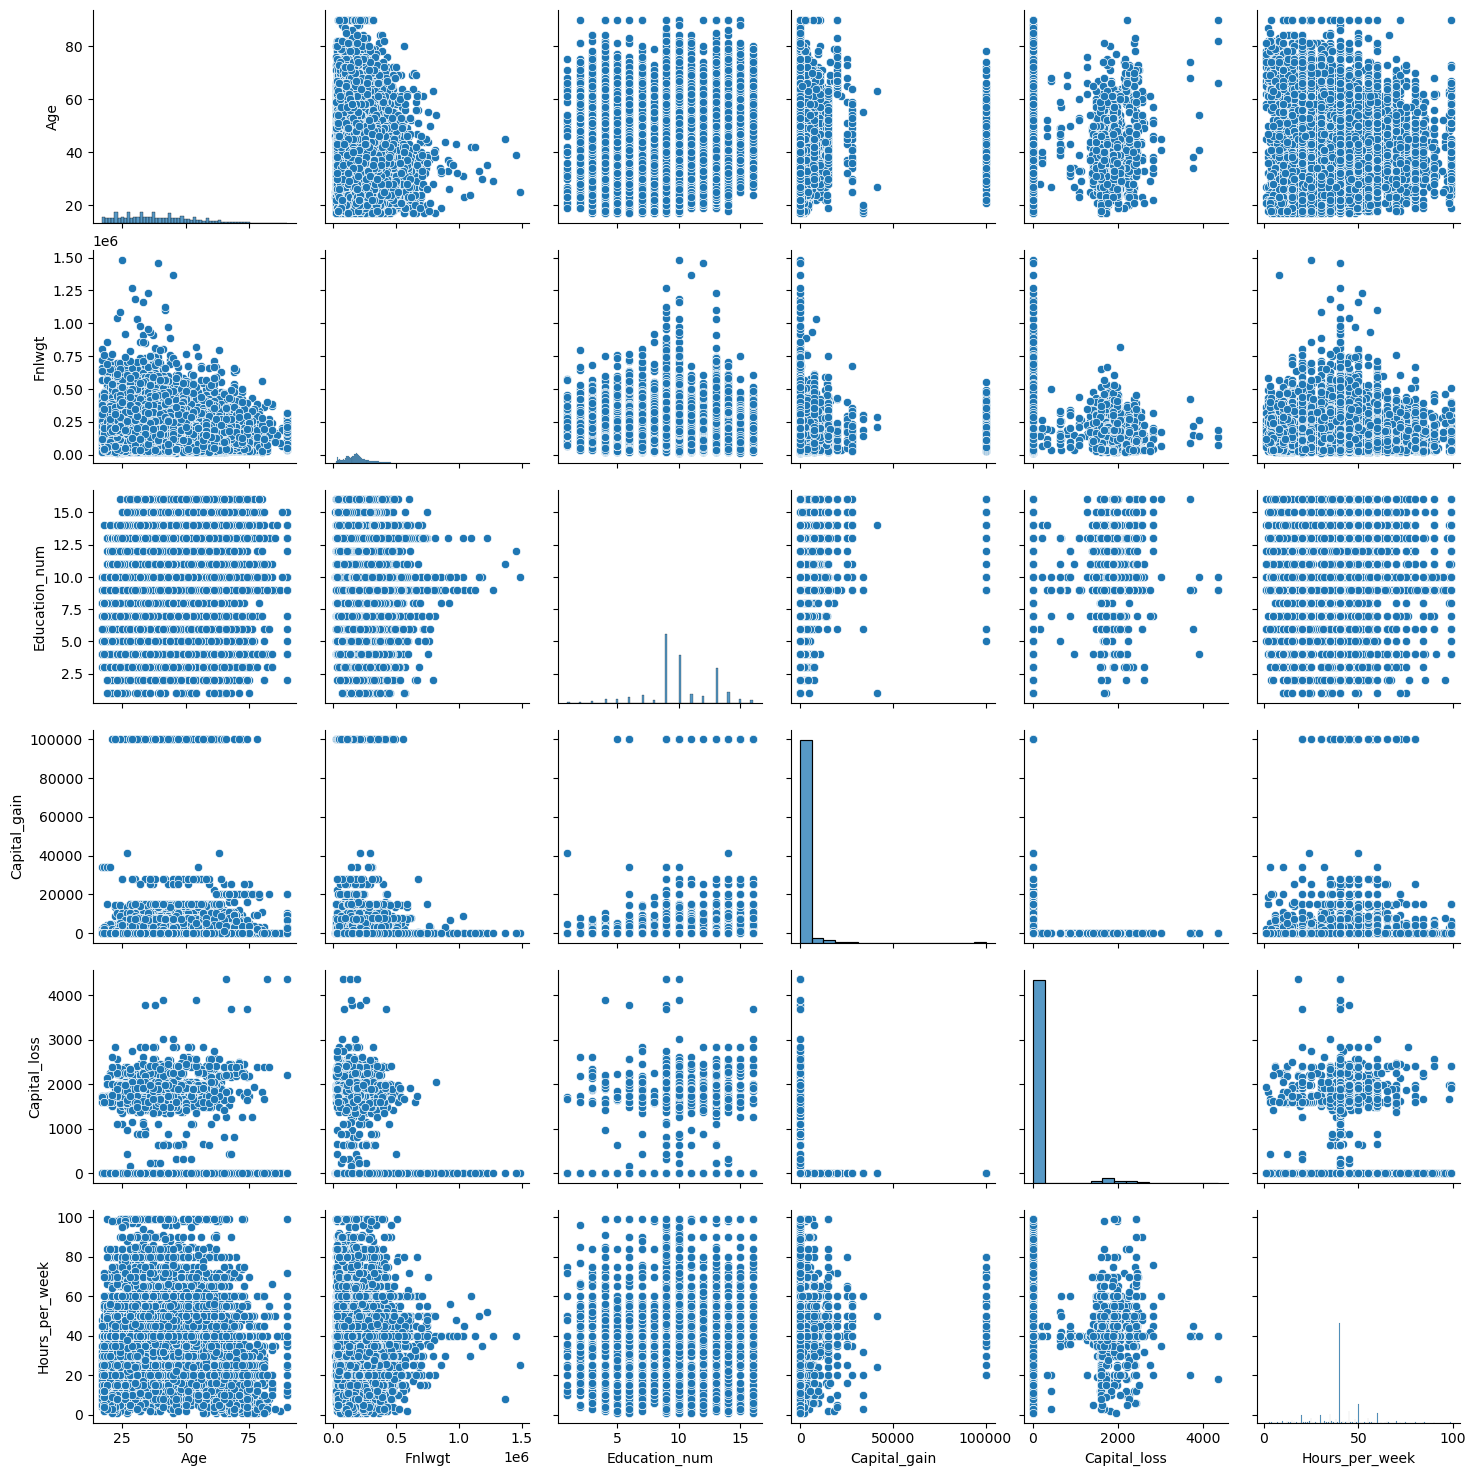

In [47]:
sns.pairplot(df)

#### Checking for Outliers

Checking Outliers using boxplot

Since Education_num is the numerical representation of Education column. Hence we not include Education_num column in outliers detection.

In [48]:
num_columns=[column for column in df.columns if df[column].dtypes!='O' and column not in 'Education_num']

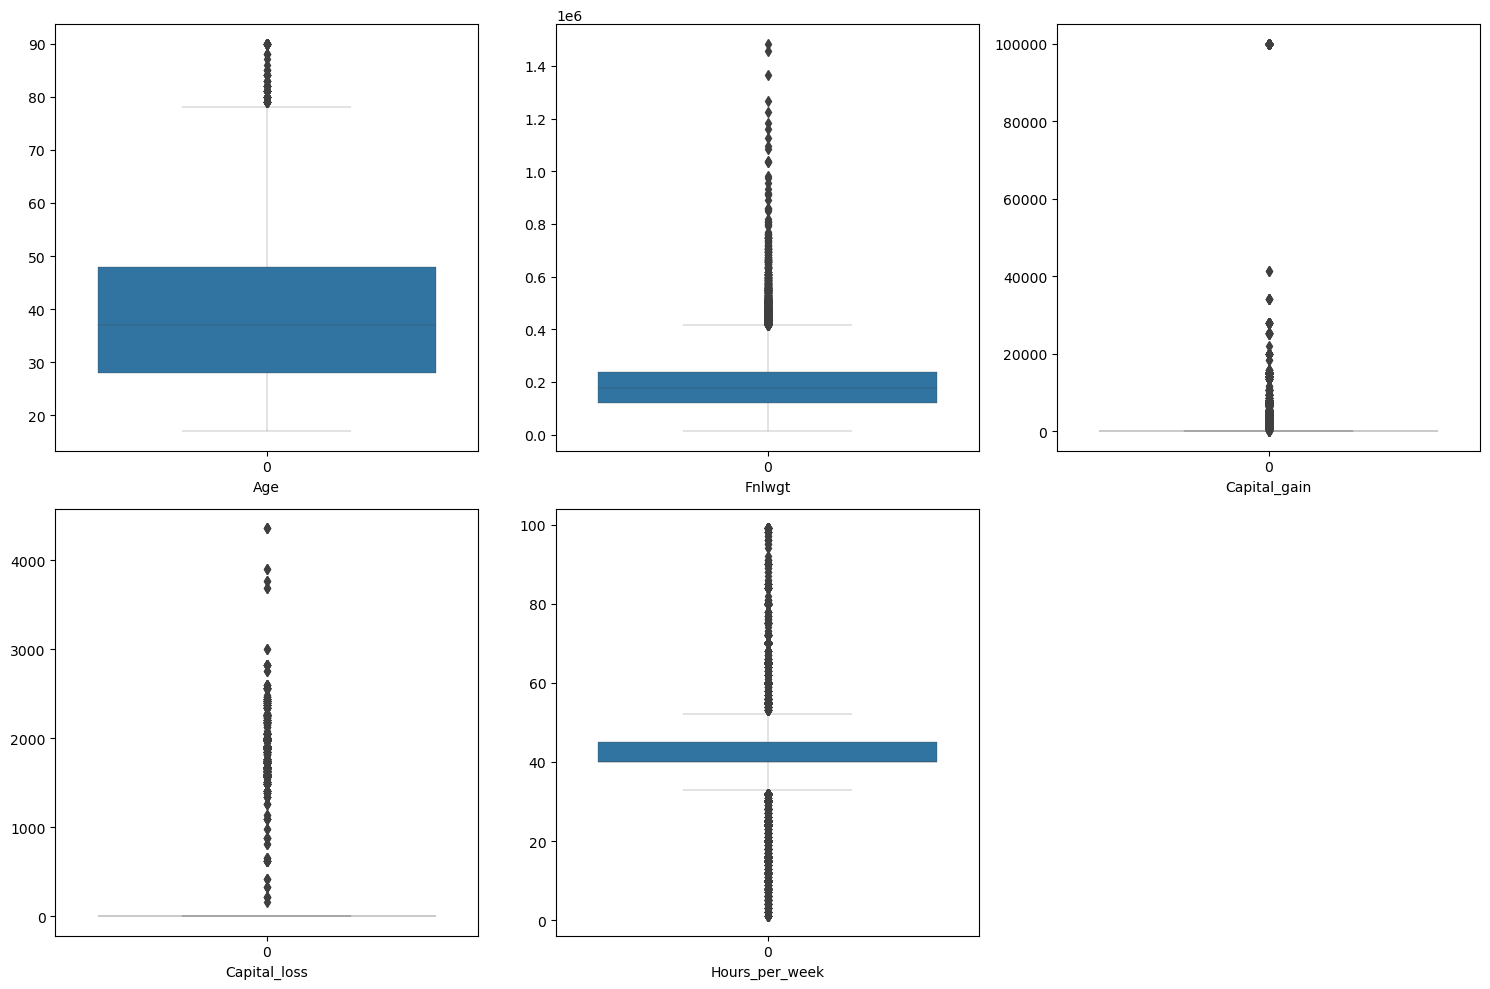

In [49]:
plt.figure(figsize=(15,10))
for index,column in enumerate(num_columns):
    if index<=len(num_columns):
        plt.subplot((len(num_columns)+1)//3,3,index+1)
        sns.boxplot(df[column],linewidth=.2)
        plt.xlabel(column)
        plt.ticklabel_format(style='plain',axis='y')
plt.tight_layout()
plt.show()

- We can observe presence of outliers in all the columns.
- High number of outliers can be seen in Capital_gain and Capital_loss columns.

Checking outlier using zscore

Copying the dataset

In [50]:
data=df.copy()

In [51]:
def outliers_detection(data):
    z_score=np.abs(zscore(data[num_columns]))
    print(np.where(z_score>3))
    return z_score

In [52]:
z_score=outliers_detection(data)

(array([    9,    22,    27, ..., 32524, 32524, 32530], dtype=int64), array([4, 3, 4, ..., 0, 4, 4], dtype=int64))


Removing outliers using zscore 

In [53]:
def outliers_removal(z_score,data):
    data=data[(z_score<3).all(axis=1)]
    return data

In [54]:
data=outliers_removal(z_score,data)

Checking data loss after outliers removal

In [55]:
total_data_loss=df.shape[0]-data.shape[0]
total_data_loss

2532

Total rows of data lost is 2532

Total percentage of data loss

In [56]:
total_data_loss_percentage=(total_data_loss*100)/df.shape[0]
total_data_loss_percentage

7.776412776412776

Total perentage of data lost is 7.77% which is within the acceptable range.

Checking outliers using IQR

In [57]:
Q1=df[num_columns].quantile(0.25)
Q3=df[num_columns].quantile(0.75)

IQR=Q3-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

bounds = (df[num_columns]>=lower_bound) & (df[num_columns]<=upper_bound)

df_no_outliers=df[bounds.all(axis=1)]

Checking data loss after outliers removal

In [58]:
total_data_loss_by_IQR=df.shape[0]-df_no_outliers.shape[0]
total_data_loss_by_IQR

12836

Checking data loss percentage after outliers removal using IQR

In [59]:
total_data_loss_percentage_by_IQR=(total_data_loss_by_IQR*100)/df.shape[0]
total_data_loss_percentage_by_IQR

39.42260442260442

- Total perentage of data lost is 39.42% which is very high. 
- Hence we will use zscore to remove outliers

Removing outliers using zscore

In [60]:
df=data.reset_index(drop=True)

Checking the shape of the dataframe after outliers removal

In [61]:
df.shape

(30028, 15)

- Now the dataset has 30028 rows and 15 columns.

Checking skewness of numerical columns

In [62]:
df[num_columns].skew()

Age                0.489206
Fnlwgt             0.633615
Capital_gain       4.957931
Capital_loss      29.761341
Hours_per_week    -0.350891
dtype: float64

- Low right skewness can be observed in column Fnlwgt.
- Column Capital_loss is highly right skewed.
- Column Capital_gain also has right skewness.

Checking skewness in Fnlwgt using sqrt method

In [63]:
fnlwgt_skewness_check_by_sqrt=np.sqrt(df['Fnlwgt'])
fnlwgt_skewness_check_by_sqrt.skew()

-0.10558623084380511

Applying sqrt in fnlwgt

In [64]:
df['Fnlwgt']=fnlwgt_skewness_check_by_sqrt

Checking skewness in Capital_gain using sqrt method

In [65]:
capital_gain_skewness_check_by_sqrt=np.sqrt(df['Capital_gain'])
capital_gain_skewness_check_by_sqrt.skew()

3.702652977355794

Checking skewness in Capital_gain using cbrt method

In [66]:
capital_gain_skewness_check_by_cbrt=np.cbrt(df['Capital_gain'])
capital_gain_skewness_check_by_cbrt.skew()

3.3840059609767774

Checking skewness in Capital_gain using log method

In [67]:
capital_gain_skewness_check_by_log=np.log(df['Capital_gain']+.001)
capital_gain_skewness_check_by_log.skew()

3.0962282822859946

Checking skewness in Capital_gain using boxcox method

In [68]:
capital_gain_skewness_check_by_boxcox,_=boxcox(df['Capital_gain']+.001)
data=pd.DataFrame()
data['Capital_gain']=capital_gain_skewness_check_by_boxcox
data['Capital_gain'].skew()

3.0825248777552297

- We can observe that by applying boxcox although high the lowest skewness can be achieved. Hence we will apply boxcox to remove skewness.

In [69]:
df['Capital_gain']=capital_gain_skewness_check_by_boxcox

Checking skewness in Capital_gain using yeo-johnson transformation

In [70]:
pt = PowerTransformer(method='yeo-johnson')
data['Capital_gain_transformed'] = pt.fit_transform(df[['Capital_gain']])
data['Capital_gain_transformed'].skew()

3.0825248775694023

Checking skewness in Capital_loss using sqrt method

In [71]:
capital_loss_skewness_check_by_sqrt=np.sqrt(df['Capital_loss'])
capital_loss_skewness_check_by_sqrt.skew()

26.701613756233904

Checking skewness in Capital_loss using cbrt method

In [72]:
capital_loss_skewness_check_by_cbrt=np.cbrt(df['Capital_loss'])
capital_loss_skewness_check_by_cbrt.skew()

25.852843724015106

Checking skewness in Capital_loss using log method

In [73]:
capital_loss_skewness_check_by_log=np.log(df['Capital_loss']+.001)
capital_loss_skewness_check_by_log.skew()

25.01250528369989

Checking skewness in Capital_loss using boxcox method

In [74]:
capital_loss_skewness_check_by_boxcox,_=boxcox(df['Capital_loss']+.1)
data=pd.DataFrame()
data['Capital_loss']=capital_loss_skewness_check_by_boxcox
data['Capital_loss'].skew()

24.95289843614644

- We can observe that by applying boxcox although high the lowest skewness can be achieved. Hence we will apply boxcox to remove skewness.

In [75]:
df['Capital_loss']=capital_loss_skewness_check_by_boxcox

Verifying skewness

In [76]:
df[num_columns].skew()

Age                0.489206
Fnlwgt            -0.105586
Capital_gain       3.082525
Capital_loss      24.952898
Hours_per_week    -0.350891
dtype: float64

Feature Selection

- We can drop the column Education as Education_num is the numerical representation of Education.

In [77]:
df.drop('Education',axis=1,inplace=True)

#### Label Encoding of categorical columns

In [78]:
cat_columns=[column for column in df.columns if df[column].dtypes=='O']
le=LabelEncoder()
df[cat_columns]=df[cat_columns].apply(lambda x:le.fit_transform(x))

Checking the dataset

In [79]:
df

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,288.636450,13,2,3,0,4,1,-311.953718,-1.624975e+69,13,37,1
1,38,3,464.377002,9,0,5,1,4,1,-311.953718,-1.624975e+69,40,37,1
2,53,3,484.480134,7,2,5,0,2,1,-311.953718,-1.624975e+69,40,37,1
3,28,3,581.729318,13,2,9,5,2,0,-311.953718,-1.624975e+69,40,4,1
4,37,3,533.462276,14,2,3,5,4,0,-311.953718,-1.624975e+69,40,37,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30023,27,3,507.249446,12,2,12,5,4,0,-311.953718,-1.624975e+69,38,37,1
30024,40,3,392.904569,9,2,6,0,4,1,-311.953718,-1.624975e+69,40,37,0
30025,58,3,389.756334,9,6,0,4,4,0,-311.953718,-1.624975e+69,40,37,1
30026,22,3,448.876375,9,4,0,3,4,1,-311.953718,-1.624975e+69,20,37,1


Analysing the dataset through correlation

<Axes: >

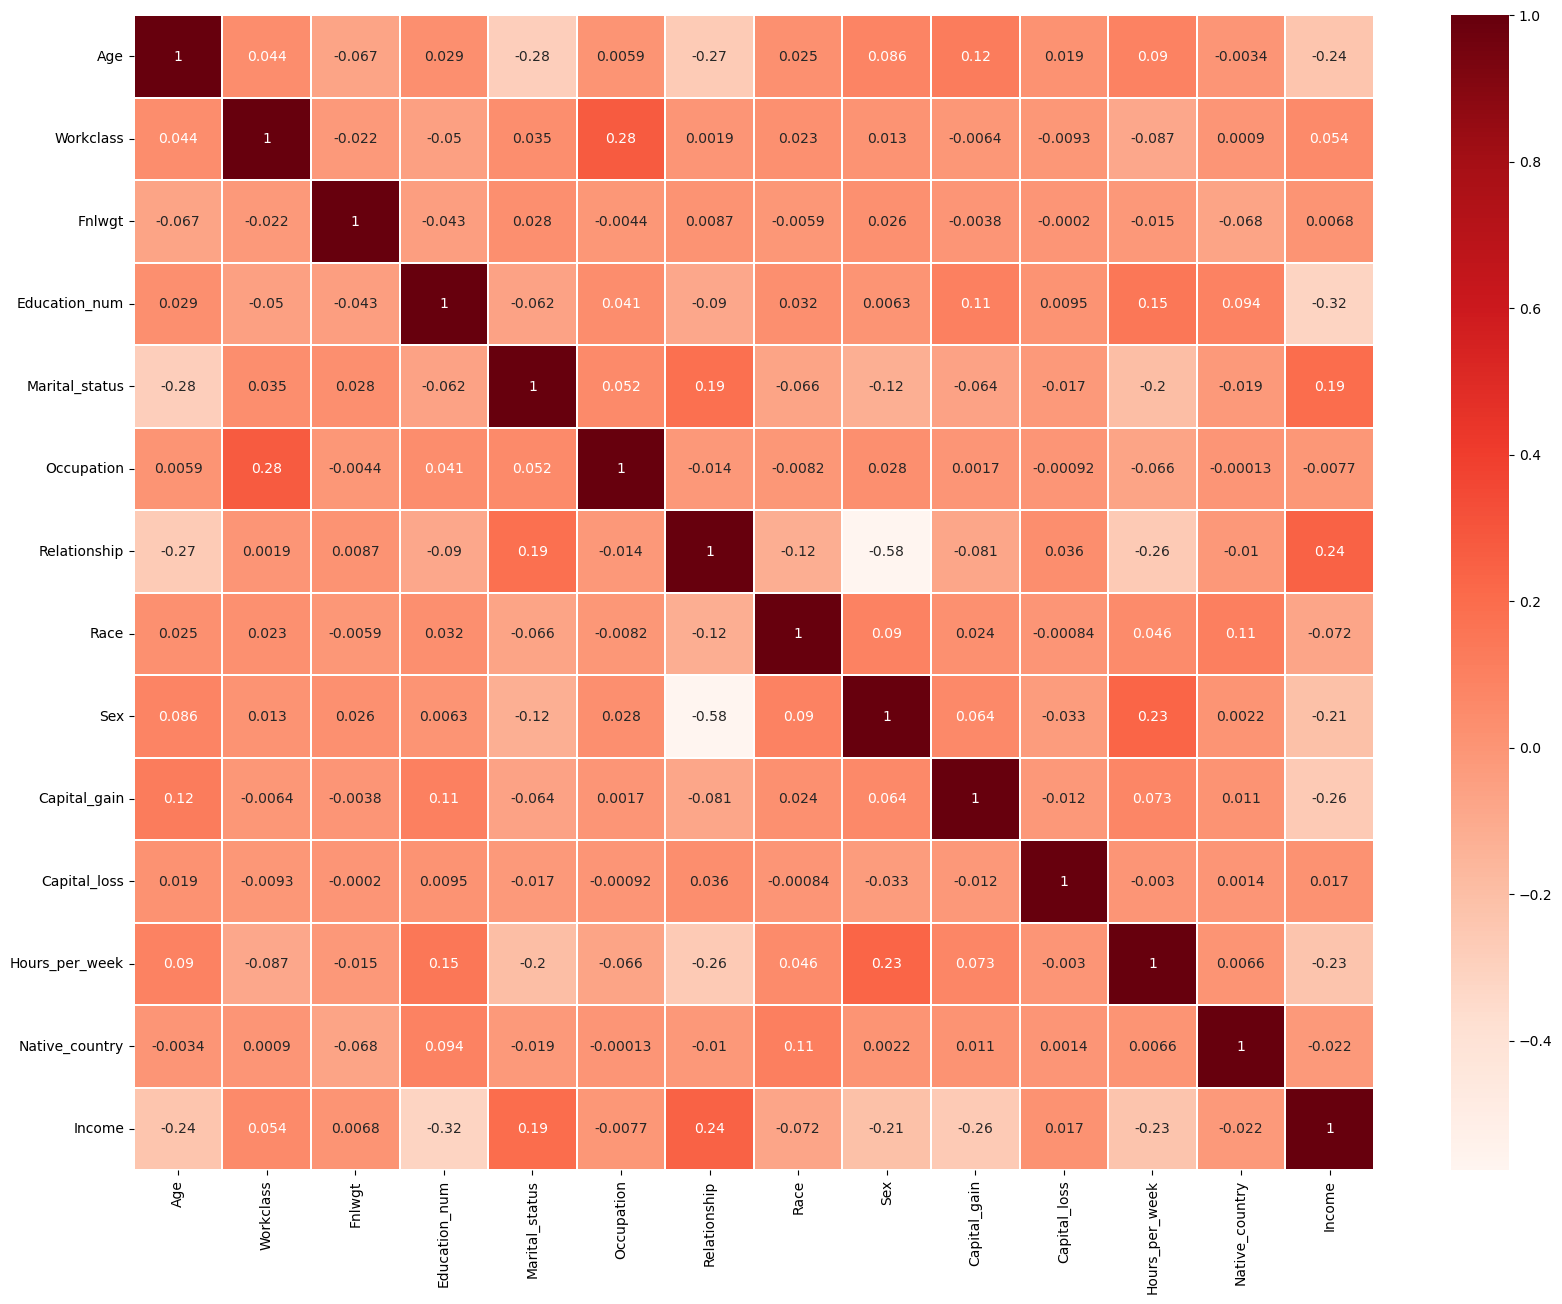

In [80]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,fmt='.2g',linewidth=.1,cmap='Reds')

- We can observe that not much correlation onserved among all columns.
- Column Income has negative correlation with Age, Education_num, Race, Sex, Capital_gain, Hours_per_week and Native_country.

Scaling the dataset

Separating the target and independent columns

In [81]:
x=df.drop('Income',axis=1)
y=df['Income']

In [82]:
def StandardScaling(x):
    st=StandardScaler()
    x=pd.DataFrame(st.fit_transform(x),columns=x.columns)
    return x

In [83]:
StandardScaling(x)

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.883097,1.189897,-1.115469,1.173719,-0.412219,-0.782768,-0.918763,0.394659,0.715637,-0.296001,-0.040013,-2.411906,0.260620
1,-0.013956,-0.217387,0.430927,-0.402931,-1.732903,-0.321058,-0.297202,0.394659,0.715637,-0.296001,-0.040013,0.010616,0.260620
2,1.107361,-0.217387,0.607821,-1.191256,-0.412219,-0.321058,-0.918763,-1.953203,0.715637,-0.296001,-0.040013,0.010616,0.260620
3,-0.761501,-0.217387,1.463547,1.173719,-0.412219,0.602362,2.189042,-1.953203,-1.397357,-0.296001,-0.040013,0.010616,-5.298624
4,-0.088711,-0.217387,1.038830,1.567881,-0.412219,-0.782768,2.189042,0.394659,-1.397357,-0.296001,-0.040013,0.010616,0.260620
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30023,-0.836255,-0.217387,0.808175,0.779556,-0.412219,1.294926,2.189042,0.394659,-1.397357,-0.296001,-0.040013,-0.168830,0.260620
30024,0.135553,-0.217387,-0.197981,-0.402931,-0.412219,-0.090203,-0.918763,0.394659,0.715637,-0.296001,-0.040013,0.010616,0.260620
30025,1.481133,-0.217387,-0.225684,-0.402931,2.229149,-1.475333,1.567481,0.394659,-1.397357,-0.296001,-0.040013,0.010616,0.260620
30026,-1.210027,-0.217387,0.294532,-0.402931,0.908465,-1.475333,0.945920,0.394659,0.715637,-0.296001,-0.040013,-1.783845,0.260620


#### Checking the Variance Inflation Factor

In [84]:
def vif_cal(x):
    vif=pd.DataFrame()
    vif['Columns']=x.columns
    vif['VIF Factor']=[VIF(x.values,i) for i in range(x.shape[1])]
    return vif

In [85]:
vif_cal(x)

,Columns,VIF Factor
0,Age,0.982853
1,Workclass,0.993110
2,Fnlwgt,0.979145
3,Education_num,0.972814
4,Marital_status,0.997566
5,Occupation,0.996640
6,Relationship,0.996004
7,Race,0.971552
8,Sex,1.000567
9,Capital_gain,0.979174


- The Capital_loss column has high variance inflation. Hence we will drop the column.

Dropping the column Capital_loss

In [86]:
x.drop('Capital_loss',axis=1,inplace=True)

Checking variance inflation

In [87]:
vif_cal(x)

,Columns,VIF Factor
0,Age,9.191577
1,Workclass,6.824422
2,Fnlwgt,12.620723
3,Education_num,15.852330
4,Marital_status,4.219224
5,Occupation,3.458918
6,Relationship,2.783087
7,Race,18.157024
8,Sex,4.388302
9,Capital_gain,11.090897


- The Native_country column has high variance inflation. Hence we will drop the column.

Dropping Native_country column

In [88]:
x.drop('Native_country',axis=1,inplace=True)

Checking variance inflation

In [89]:
vif_cal(x)

,Columns,VIF Factor
0,Age,8.837620
1,Workclass,6.763574
2,Fnlwgt,12.433357
3,Education_num,14.676234
4,Marital_status,4.146115
5,Occupation,3.456152
6,Relationship,2.700151
7,Race,16.543556
8,Sex,4.343105
9,Capital_gain,10.676393


- Column Race, Hours_per_week, Education_num and Fnlwgt has variance above acceptable range.
- Hence we will drop the column Race as it has the highest variance inflation factor

Dropping column Race

In [90]:
x.drop('Race',axis=1,inplace=True)

Checking Variacne Inflation

In [91]:
vif_cal(x)

,Columns,VIF Factor
0,Age,8.528059
1,Workclass,6.657957
2,Fnlwgt,12.046264
3,Education_num,13.978152
4,Marital_status,4.113582
5,Occupation,3.455569
6,Relationship,2.680906
7,Sex,4.270690
8,Capital_gain,10.329944
9,Hours_per_week,13.302862


- Column Hours_per_week, Education_num and Fnlwgt has variance above acceptable range.
- However, these columns are crucial for predicting income. Therefore, we will retain all of them.

Imbalance dataset check

Checking value counts of Income

In [92]:
y.value_counts()

Income
1    23369
0     6659
Name: count, dtype: int64

- We can observe that the dataset is imbalanced. Hence we need to apply SMOTE to make the dataset balanced.

Applying SMOTE to make the dataset balance

In [93]:
sm=SMOTE()
x,y=sm.fit_resample(x,y)

Verifying the value counts

In [94]:
y.value_counts()

Income
1    23369
0    23369
Name: count, dtype: int64

- Now the dataset is balanced and ready for modelling

### Modelling

Evaluating the best random_state using Logistic regression

In [95]:
def best_random_state(x,y):
    best_randomstate=0
    best_score=0
    
    lr=LogisticRegression()
    for rs in range (1,201):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=rs)
        lr.fit(x_train,y_train)
        prediction=lr.predict(x_test)
        score=accuracy_score(y_test,prediction)
        
        if score>best_score:
            best_score=score
            best_randomstate=rs
    print('Accuracy score: {} and Random state: {}'.format(best_score, best_randomstate))

In [96]:
best_random_state(x,y)

Accuracy score: 0.7812580231065469 and Random state: 169


Spliting dataset into train and test

In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=169)

Logistic regression model

In [98]:
def logistic_regression(x_train,x_test,y_train,y_test):
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    lr_pred=lr.predict(x_test)
    
    acc_lr=accuracy_score(y_test,lr_pred)
    print('The accuracy using Logistic regression is: {:4f}% '.format((acc_lr)*100))
    print(confusion_matrix(y_test,lr_pred))
    print(classification_report(y_test,lr_pred))
    
    return lr_pred, acc_lr

In [99]:
lr_pred, acc_lr=logistic_regression(x_train,x_test,y_train,y_test)

The accuracy using Logistic regression is: 77.663671% 
[[5821 1237]
 [1895 5069]]
              precision    recall  f1-score   support

           0       0.75      0.82      0.79      7058
           1       0.80      0.73      0.76      6964

    accuracy                           0.78     14022
   macro avg       0.78      0.78      0.78     14022
weighted avg       0.78      0.78      0.78     14022



Support Vector Classification

In [100]:
def support_vector(x_train,x_test,y_train,y_test):
    svc=SVC()
    svc.fit(x_train,y_train)
    svc_pred=svc.predict(x_test)
    acc_svc=accuracy_score(y_test,svc_pred)
    
    print('The accuracy using SVC is: {:4f}% '.format((acc_svc)*100))
    print(confusion_matrix(y_test,svc_pred))
    print(classification_report(y_test,svc_pred))
    
    return svc_pred, acc_svc

In [101]:
svc_pred, acc_svc=support_vector(x_train,x_test,y_train,y_test)

The accuracy using SVC is: 73.284838% 
[[5428 1630]
 [2116 4848]]
              precision    recall  f1-score   support

           0       0.72      0.77      0.74      7058
           1       0.75      0.70      0.72      6964

    accuracy                           0.73     14022
   macro avg       0.73      0.73      0.73     14022
weighted avg       0.73      0.73      0.73     14022



Random Forest Classifier

In [102]:
def random_forest(x_train,x_test,y_train,y_test):
    
    rfc=RandomForestClassifier()
    rfc.fit(x_train,y_train)
    rfc_pred=rfc.predict(x_test)
    
    acc_rfc=accuracy_score(y_test,rfc_pred)
    print('The accuracy using Random Forest is: {:4f}% '.format((accuracy_score(y_test,rfc_pred))*100))
    print(confusion_matrix(y_test,rfc_pred))
    print(classification_report(y_test,rfc_pred))
    
    return rfc_pred,acc_rfc

In [103]:
rfc_pred,acc_rfc = random_forest(x_train,x_test,y_train,y_test)

The accuracy using Random Forest is: 88.746256% 
[[6420  638]
 [ 940 6024]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      7058
           1       0.90      0.87      0.88      6964

    accuracy                           0.89     14022
   macro avg       0.89      0.89      0.89     14022
weighted avg       0.89      0.89      0.89     14022



Adaboost Classifier

In [104]:
def adaboost(x_train,x_test,y_train,y_test):
    
    abc=AdaBoostClassifier()
    abc.fit(x_train,y_train)
    abc_pred=abc.predict(x_test)
    
    acc_abc=accuracy_score(y_test,abc_pred)
    print('The accuracy using Adaboost is: {:4f}% '.format((accuracy_score(y_test,abc_pred))*100))
    print(confusion_matrix(y_test,abc_pred))
    print(classification_report(y_test,abc_pred))
    
    return abc_pred, acc_abc

In [105]:
abc_pred, acc_abc = adaboost(x_train,x_test,y_train,y_test)

The accuracy using Adaboost is: 84.353159% 
[[6237  821]
 [1373 5591]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      7058
           1       0.87      0.80      0.84      6964

    accuracy                           0.84     14022
   macro avg       0.85      0.84      0.84     14022
weighted avg       0.85      0.84      0.84     14022



Gradient Boost Classifier

In [106]:
def gradientboost(x_train,x_test,y_train,y_test):
    
    gbc=GradientBoostingClassifier()
    gbc.fit(x_train,y_train)
    gbc_pred=gbc.predict(x_test)
    
    acc_gbc=accuracy_score(y_test,gbc_pred)
    print('The accuracy using Gradientboost is: {:4f}% '.format((accuracy_score(y_test,gbc_pred))*100))
    print(confusion_matrix(y_test,gbc_pred))
    print(classification_report(y_test,gbc_pred))
    
    return gbc_pred,acc_gbc

In [107]:
gbc_pred, acc_gbc = gradientboost(x_train,x_test,y_train,y_test)

The accuracy using Gradientboost is: 86.043360% 
[[6284  774]
 [1183 5781]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      7058
           1       0.88      0.83      0.86      6964

    accuracy                           0.86     14022
   macro avg       0.86      0.86      0.86     14022
weighted avg       0.86      0.86      0.86     14022



Bagging classifier

In [108]:
def baggingclassifier(x_train,x_test,y_train,y_test):
    
    bc=BaggingClassifier()
    bc.fit(x_train,y_train)
    bc_pred=bc.predict(x_test)
    
    acc_bc=accuracy_score(y_test,bc_pred)
    print('The accuracy using Bagging classfier is: {:4f}% '.format((accuracy_score(y_test,bc_pred))*100))
    print(confusion_matrix(y_test,bc_pred))
    print(classification_report(y_test,bc_pred))
    
    return bc_pred,acc_bc

In [109]:
bc_pred, acc_bc = baggingclassifier(x_train,x_test,y_train,y_test)

The accuracy using Bagging classfier is: 87.505349% 
[[6467  591]
 [1161 5803]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      7058
           1       0.91      0.83      0.87      6964

    accuracy                           0.88     14022
   macro avg       0.88      0.87      0.87     14022
weighted avg       0.88      0.88      0.87     14022



ExtraTree classifier

In [110]:
def extratree_classifier(x_train,x_test,y_train,y_test):
    
    etc=ExtraTreesClassifier()
    etc.fit(x_train,y_train)
    etc_pred=etc.predict(x_test)
    
    acc_etc=accuracy_score(y_test,etc_pred)
    print('The accuracy using Extratrees is: {:4f}% '.format((accuracy_score(y_test,etc_pred))*100))
    print(confusion_matrix(y_test,etc_pred))
    print(classification_report(y_test,etc_pred))
    
    return etc_pred, acc_etc

In [111]:
etc_pred, acc_etc=extratree_classifier(x_train,x_test,y_train,y_test)

The accuracy using Extratrees is: 88.140066% 
[[6387  671]
 [ 992 5972]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      7058
           1       0.90      0.86      0.88      6964

    accuracy                           0.88     14022
   macro avg       0.88      0.88      0.88     14022
weighted avg       0.88      0.88      0.88     14022



DecisionTree classifier

In [112]:
def decisiontree_classifier(x_train,x_test,y_train,y_test):
    
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    dtc_pred=dtc.predict(x_test)
    
    acc_dtc=accuracy_score(y_test,dtc_pred)
    print('The accuracy using Decisiontree is: {:4f}% '.format((accuracy_score(y_test,dtc_pred))*100))
    print(confusion_matrix(y_test,dtc_pred))
    print(classification_report(y_test,dtc_pred))
    
    return dtc_pred, acc_dtc

In [113]:
dtc_pred, acc_dtc = decisiontree_classifier(x_train,x_test,y_train,y_test)

The accuracy using Decisiontree is: 84.367423% 
[[6050 1008]
 [1184 5780]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      7058
           1       0.85      0.83      0.84      6964

    accuracy                           0.84     14022
   macro avg       0.84      0.84      0.84     14022
weighted avg       0.84      0.84      0.84     14022



KNN classifier

In [114]:
def knn(x_train,x_test,y_train,y_test):
    
    knn=KNeighborsClassifier()
    knn.fit(x_train,y_train)
    knn_pred=knn.predict(x_test)
    
    acc_knn=accuracy_score(y_test,knn_pred)
    print('The accuracy using KNN is: {:4f}% '.format((accuracy_score(y_test,knn_pred))*100))
    print(confusion_matrix(y_test,knn_pred))
    print(classification_report(y_test,knn_pred))
    
    return knn_pred, acc_knn

In [115]:
knn_pred, acc_knn = knn(x_train,x_test,y_train,y_test)

The accuracy using KNN is: 79.796035% 
[[6566  492]
 [2341 4623]]
              precision    recall  f1-score   support

           0       0.74      0.93      0.82      7058
           1       0.90      0.66      0.77      6964

    accuracy                           0.80     14022
   macro avg       0.82      0.80      0.79     14022
weighted avg       0.82      0.80      0.79     14022



Ridge Classifier

In [116]:
def ridge(x_train,x_test,y_train,y_test):
    
    rd=RidgeClassifier()
    rd.fit(x_train,y_train)
    rd_pred=rd.predict(x_test)
    
    acc_rd=accuracy_score(y_test,rd_pred)
    print('The accuracy using Ridge is: {:4f}% '.format((accuracy_score(y_test,rd_pred))*100))
    print(confusion_matrix(y_test,rd_pred))
    print(classification_report(y_test,rd_pred))
    
    return rd_pred, acc_rd

In [117]:
rd_pred, acc_rd = ridge(x_train,x_test,y_train,y_test)

The accuracy using Ridge is: 77.877621% 
[[5877 1181]
 [1921 5043]]
              precision    recall  f1-score   support

           0       0.75      0.83      0.79      7058
           1       0.81      0.72      0.76      6964

    accuracy                           0.78     14022
   macro avg       0.78      0.78      0.78     14022
weighted avg       0.78      0.78      0.78     14022



#### Cross Validating the models

In [118]:
def cross_validation(x,y,*args):
    
    # Cross validation for Logistic Regression
    lr=LogisticRegression()
    lr_score=cross_val_score(lr,x,y)
    diff_lr=accuracy_score(y_test,lr_pred)-lr_score.mean()
    
    # Cross SVC
    svc=SVC()
    svc_score=cross_val_score(svc,x,y)
    diff_svc=accuracy_score(y_test,svc_pred)-svc_score.mean()
    
    # Cross validation for RandomForestClassifier
    rfc=RandomForestClassifier()
    rfc_score=cross_val_score(rfc,x,y)
    diff_rfc=accuracy_score(y_test,rfc_pred)-rfc_score.mean()
    
    # Cross validation for AdaBoostClassifier
    abc=AdaBoostClassifier()
    abc_score=cross_val_score(abc,x,y)
    diff_abc=accuracy_score(y_test,abc_pred)-abc_score.mean()
    
    # Cross validation for GradientBoostingClassifier
    gbc=GradientBoostingClassifier()
    gbc_score=cross_val_score(gbc,x,y)
    diff_gbc=accuracy_score(y_test,gbc_pred)-gbc_score.mean()
    
    # Cross validation for BaggingClassifier
    bc=BaggingClassifier()
    bc_score=cross_val_score(bc,x,y)
    diff_bc=accuracy_score(y_test,bc_pred)-bc_score.mean()
    
    # Cross validation for ExtraTreesClassifier
    etc=ExtraTreesClassifier()
    etc_score=cross_val_score(etc,x,y)
    diff_etc=accuracy_score(y_test,etc_pred)-etc_score.mean()
    
    # Cross validation for DecisionTreeClassifier
    dtc=DecisionTreeClassifier()
    dtc_score=cross_val_score(dtc,x,y)
    diff_dtc=accuracy_score(y_test,dtc_pred)-dtc_score.mean()
    
    # Cross validation for KNeighborsClassifier
    knn=KNeighborsClassifier()
    knn_score=cross_val_score(knn,x,y)
    diff_knn=accuracy_score(y_test,knn_pred)-knn_score.mean()
    
    # Cross validation for RidgeClassifier
    rd=RidgeClassifier()
    rd_score=cross_val_score(rd,x,y)
    diff_rd=accuracy_score(y_test,rd_pred)-rd_score.mean()
    
    df=pd.DataFrame({'Classification Name':['Logistic Regression',
                                        'SVC',
                                        'RandomForestClassifier',
                                        'AdaBoostClassifier',
                                        'GradientBoostingClassifier',
                                        'BaggingClassifier',
                                        'ExtraTreesClassifier',
                                        'DecisionTreeClassifier',
                                        'KNeighborsClassifier',
                                        'RidgeClassfier'],
                     'Classification Score':[acc_lr, acc_svc, acc_rfc, acc_abc, acc_gbc, acc_bc, acc_etc, acc_dtc, acc_knn,acc_rd],
                     'Cross Val Score':[lr_score.mean(), 
                                        svc_score.mean(), 
                                        rfc_score.mean(), 
                                        abc_score.mean(), 
                                        gbc_score.mean(), 
                                        bc_score.mean(), 
                                        etc_score.mean(), 
                                        dtc_score.mean(), 
                                        knn_score.mean(),
                                        rd_score.mean()],
                     'Difference': [diff_lr, diff_svc, diff_rfc, diff_abc, diff_gbc, diff_bc, diff_etc, diff_dtc, diff_knn, diff_rd]
                    })
    return df

In [119]:
model_pred=[lr_pred, svc_pred, rfc_pred, abc_pred, gbc_pred, bc_pred, etc_pred, dtc_pred, knn_pred,rd_pred]

In [120]:
cross_validation(x,y,model_pred)

,Classification Name,Classification Score,Cross Val Score,Difference
0,Logistic Regression,0.776637,0.769481,0.007155
1,SVC,0.732848,0.727031,0.005817
2,RandomForestClassifier,0.887463,0.884142,0.003320
3,AdaBoostClassifier,0.843532,0.838183,0.005348
4,GradientBoostingClassifier,0.860434,0.856221,0.004213
5,BaggingClassifier,0.875053,0.875092,-0.000038
6,ExtraTreesClassifier,0.881401,0.878879,0.002522
7,DecisionTreeClassifier,0.843674,0.850701,-0.007026
8,KNeighborsClassifier,0.797960,0.810797,-0.012836
9,RidgeClassfier,0.778776,0.771835,0.006941


- RandomForestClassifier is the best model because it has the highest Classification Score and a very high Cross Val Score, with a relatively small difference between the two (0.003320). 
- This indicates that it performs well on both the training data and the validation data, making it a reliable choice for predicting income.

#### Hyper parameter tuning

Creating the parameter list

In [121]:
parameters = {'n_estimators': [100, 200],
              'random_state': [42,45,70,79],
              'max_depth': [None, 10, 20],
              'max_features': ['auto', 'sqrt', 'log2'],
              'n_jobs':[-2, -1, 1],
              'criterion':['criterion','gini']
             }

In [122]:
gridsearch_cv=GridSearchCV(RandomForestClassifier(),parameters,cv=5)
gridsearch_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['criterion', 'gini'],
                         'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200], 'n_jobs': [-2, -1, 1],
                         'random_state': [42, 45, 70, 79]})

Checking the best parameters

In [123]:
gridsearch_cv.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': 79}

## Creating the final model

In [124]:
def finalmodel(x_train,x_test,y_train,y_test):
    final_model=RandomForestClassifier(criterion='gini',max_depth=None,max_features='auto',n_estimators=200,n_jobs=-2,random_state=79)
    final_model.fit(x_train,y_train)
    prediction=final_model.predict(x_test)
    accuracy=accuracy_score(y_test,prediction)
    
    print('The final accuracy is: {:.2f}%'.format((accuracy)*100))
    
    return final_model, prediction, accuracy

In [125]:
final_model, prediction, accuracy=finalmodel(x_train,x_test,y_train,y_test)

The final accuracy is: 88.83%


#### Plotting ROC curve and comparing AUC

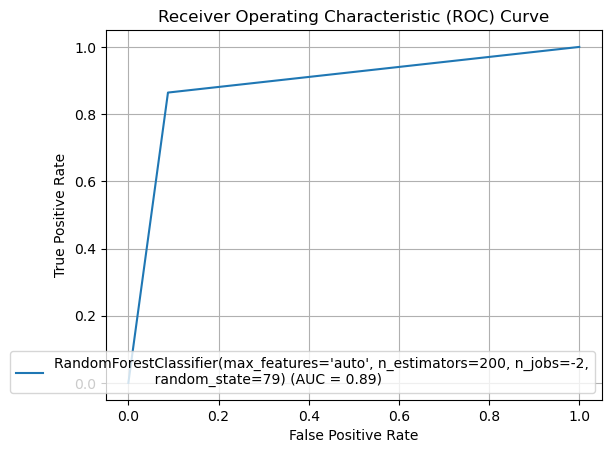

In [126]:
fpr,tpr, thresholds=metrics.roc_curve(y_test,prediction)
roc_auc=metrics.auc(fpr,tpr)
disp=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=final_model)
disp.plot()
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

## Saving the Model

In [127]:
file='Census_Income_Prediction.pkl'
pickle.dump(final_model,open(file,'wb'))